In [1]:
# q1

In [2]:
# a

In [1]:
import pandas as pd

df = pd.read_csv("Auto.csv", na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [2]:
# b

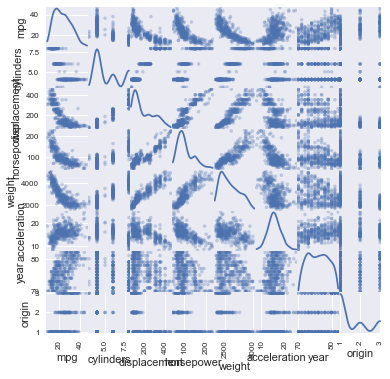

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.style.use('seaborn')

df_q = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
scatter_matrix(df, alpha = 0.3, figsize = (6,6), diagonal = 'kde')
plt.show()

In [5]:
# c

In [6]:
df_q.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [7]:
# d

In [8]:
import statsmodels.api as sm

df_1 = df_q.drop(columns = ['mpg'])
X = sm.add_constant(df_1)

reg = sm.OLS(df_q['mpg'], X, missing = 'drop')
result = reg.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        18:56:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [9]:
# i. Coefficients of displacement, weight, year and origin are at the 1% significant level.

# ii. Coefficients of cylinders, horsepower and acceleration are not at the 10% significant level.

# iii. The miles per gallon is expected to increase 0.7508 on averge for a one unit increase in year while all others are constant.


In [10]:
# e

In [11]:
df_1['cylinders^2'] = df_1['cylinders']**2
df_1['acceleration^2'] = df_1['acceleration']**2
df_1['origin^2'] = df_1['origin']**2
df_1['displacement^2'] = df_1['displacement']**2

X_1 = sm.add_constant(df_1)
reg_1 = sm.OLS(df_q['mpg'], X_1, missing = 'drop')
results_1 = reg_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.99e-153
Time:                        18:56:58   Log-Likelihood:                -979.27
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     380   BIC:                             2030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2019      7.474     -0.

In [12]:
# i. Three variables are cylinders, displacement and origin.

# ii. Adjusted R-squared is 0.853, and this is better than the adjusted R-squared from part(d).

# iii. They are both statisticaly significant at 1% level.

# iv. Cylinders variable is still not statisticaly significant at 10% level.


In [13]:
# f

In [14]:
X1 = [1, 6, 200, 100, 3100, 15.1, 99, 1, 6**2, 15.1**2, 1, 200**2]
results_1.predict(X1)


array([38.67266199])

In [15]:
# The predicted miles per gallon mpg is 38.67.

In [16]:
# q2

In [17]:
# a

In [18]:
import numpy as np

df_1 = pd.DataFrame(data = {'x1' : [0, 2, 0 , 0, -1, 1],
              'x2' : [3, 0, 1, 1, 0, 1], 
              'x3' : [0, 0, 3, 2, 1, 1], 
              'y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df_f = pd.DataFrame(df_1)
df_f['dis'] = np.sqrt(df_f.x1 ** 2 + df_f.x2 ** 2 + df_f.x3 ** 2)
df_f

,x1,x2,x3,y,dis
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


In [19]:
# b

In [20]:
df_f.sort_values(by = 'dis')

,x1,x2,x3,y,dis
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051
1,2,0,0,Red,2.000000
3,0,1,2,Green,2.236068
0,0,3,0,Red,3.000000
2,0,1,3,Red,3.162278


In [21]:
# The KNN prediction is green because the nearest point from the test point is the 5th observation.

In [22]:
# c: The KNN prediction is red since the three nearest neighbors are the 2nd, 5th and 6th observations which are red, green and red, and the probability of being red is greater than being green.


In [23]:
# d: we would expect the best value for K is small since the decision boundary is close to be linear if K is higher and in this case the Bayes decision boundary will be highly nonlinear.


In [24]:
# e

In [25]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
results = knn.fit(df_1[["x1", "x2", "x3"]], df_1["y"])
print("The estimation of the KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is", 
      results.predict([(0, 0, 0)])[0])


The estimation of the KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is Green


In [26]:
# q3

In [27]:
# a

In [28]:
import warnings
warnings.filterwarnings('ignore')

df_q.dropna(inplace = True)
df_q['mpg_median'] = np.median(df_q['mpg'])
df_q['mpg_high'] = np.where(df_q['mpg'] >= df_q['mpg_median'], 1, 0)

X_2 = sm.add_constant(df_q.drop(columns = ['mpg', 'mpg_median', 'mpg_high']))
reg_2 = sm.Logit(df_q['mpg_high'], X_2, missing = 'drop')
results_2 = reg_2.fit()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


In [29]:
print(results_2.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.710     
Dependent Variable: mpg_high         AIC:              173.5398  
Date:               2019-02-19 18:57 BIC:              205.3099  
No. Observations:   392              Log-Likelihood:   -78.770   
Df Model:           7                LL-Null:          -271.71   
Df Residuals:       384              LLR p-value:      2.5305e-79
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const           -17.1549   5.7638 -2.9763 0.0029 -28.4517 -5.8580
cylinders        -0.1626   0.4232 -0.3842 0.7008  -0.9920  0.6669
displacement      0.0021   0.0120  0.1741 0.8618  -0.0215  0.0257
horsepower       -0.0410   0.0239 -1

In [30]:
# weight and year are statistically significant at 5% level.

In [31]:
# b

In [32]:
from sklearn.model_selection import train_test_split

X = df_q.drop(columns = ['mpg', 'mpg_median', 'mpg_high'])
y = df_q['mpg_high']
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.5, random_state = 10)

In [33]:
# c

In [34]:
from sklearn.linear_model import LogisticRegression

log_1 = LogisticRegression().fit(X_train, y_train)
logit=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                 pd.DataFrame(np.transpose(log_1.coef_),columns=["Value of Coe."])],axis = 1)
logit

,Name,Value of Coe.
0,cylinders,-0.670904
1,displacement,0.005916
2,horsepower,-0.038426
3,weight,-0.005022
4,acceleration,-0.139044
5,year,0.299140
6,origin,-0.153165


In [35]:
# d

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = log_1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



In [38]:
# Since the f1 score are equal for no matter high mpg or low mpg and precision is better performed in low mpg, the model predicts better with low mpg.